# Demonstration of Central Limit Theorem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import truncnorm
from tqdm.auto import tqdm

def get_data(low, high, mean, std, size):
    data = np.round(truncnorm((low-mean)/std, (high-mean)/std, mean, std).rvs(size))
    return data

np.random.seed(seed=0) # for reproducibility
lazy = get_data(0, 100, 30, 15, 400000)
hardworking = get_data(0, 100, 75, 10, 600000)
all_data = np.concatenate([lazy, hardworking])

## Part 1: Description of the data

- Note: this dataset is randomly generated, does not reflect reality.

- Assume that we can obtain the math exam scores from all junior high school students studying in a country.

- This is a called a **population.**

- Let's look at the distribution of math grades for this population.

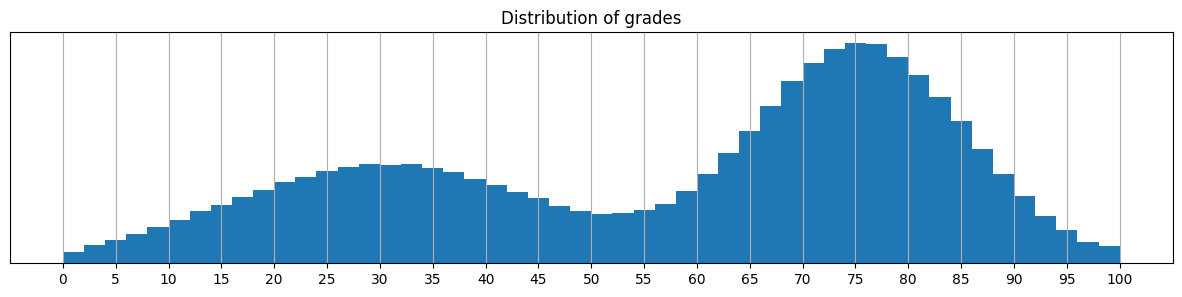

In [2]:
plt.figure(figsize=(15,3))
plt.hist(all_data, bins=50)
plt.xticks(np.arange(0,101,5))
plt.yticks([])
plt.grid()
plt.title('Distribution of grades')
plt.show()

- This distribution actually makes a lot sense because

    1. The population contains some lazy students with a mean of 30
    2. The population contains many hard-working students with a mean of 75
    
- We can also compute the mean and standard deviation of our population:

In [3]:
print('The mean of the data is', np.round(np.mean(all_data),2))
print('The standard deviation of the data is', np.round(np.std(all_data),2))

The mean of the data is 57.24
The standard deviation of the data is 24.55


Let's call these two numbers $\mu$ and $\sigma$. ($\mu = 57.24, \ \sigma=24.55$)

## Part 2: Select a sample

Now let's select a sample of size 100 students and find the sample mean.

In [4]:
sample = np.random.choice(all_data, size=100)
print('The mean of this sample is', np.round(np.mean(sample),2))

The mean of this sample is 58.77


## Part 3: Select 5 samples

Now let's select 5 samples (of again size 100) to see their means:

In [5]:
for i in range(1,6):
    sample = np.random.choice(all_data, size=100)
    print('The mean of this sample', i, 'is', np.round(np.mean(sample),2))

The mean of this sample 1 is 59.07
The mean of this sample 2 is 61.58
The mean of this sample 3 is 61.46
The mean of this sample 4 is 56.25
The mean of this sample 5 is 60.72


## Part 4: Understanding Central Limit Theorem

- Even if the underlying distribution is non-normal, if the sample size is large enough, the means of samples will approximately be normally distributed.

- Furthermore, its mean will be the same as population mean $\mu$,

- And its standard deviation will be the population standard deviation divided by the square root of sample size which is $\sigma \big/ \sqrt{\text{sample size}}$

## Part 5: Select 10 000 samples

We select 10 000 samples of size 100, and write their means to a list.

In [6]:
size = 100
samples = np.random.choice(all_data, 10000*size).reshape(10000,size) #sample 10 000 x 100 times, and divide into 10 000 samples of size 100
sample_means = samples.mean(axis=1)

## Part 6: Visualize sample means

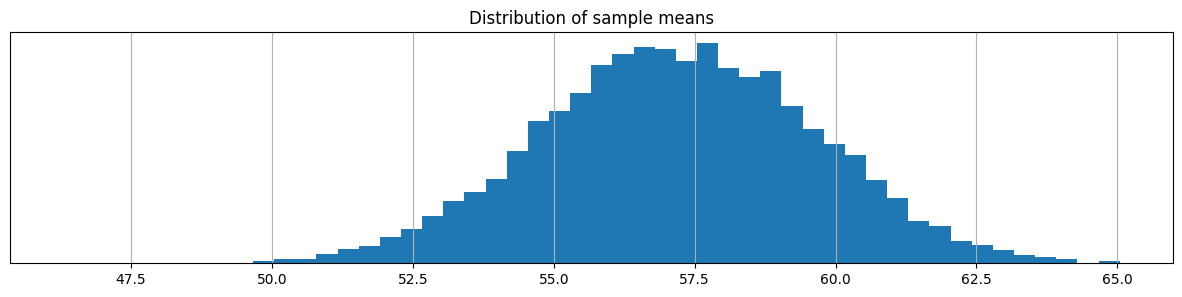

In [7]:
plt.figure(figsize=(15,3))
plt.hist(sample_means, bins=50)
plt.yticks([])
plt.grid()
plt.title('Distribution of sample means')
plt.show()

Hey! It looks very normal to me!

## Part 7: Mean and Standard Deviation of sample means

In [8]:
print('The expected mean of sample means is', np.round(np.mean(all_data),2))
print('The expected standard deviation of sample means is', np.round(np.std(all_data)/np.sqrt(100), 3))

The expected mean of sample means is 57.24
The expected standard deviation of sample means is 2.455


In [ ]:
print('The mean of sample means is', np.round(np.mean(sample_means),2))
print('The standard deviation of sample means is', np.round(np.std(sample_means),2))

The mean of sample means is 57.2
The standard deviation of sample means is 2.43


Very close!